## Import libraries

In [1]:
import quail
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import rpy2
import numpy as np

%matplotlib inline
#%load_ext rpy2.ipython
sns.set_context("notebook", font_scale=1.5)

## Load auto data

In [2]:
with open('../data/eggAuto4.p', 'rb') as file:
    egg_7 = pickle.load(file)

## Store the number of subjects

In [3]:
n_subs = len(egg_7.pres[0]) / len(egg_7.rec.ix[0])

In [4]:
n_subs

30

<h1>Load manual data

In [5]:
with open('../data/eggMan4.p', 'rb') as file:
    egg_7m = pickle.load(file)

## Stack eggs together

In [6]:
egg = quail.stack_eggs([egg_7m, egg_7])

In [7]:
egg.pres

0             1           2             3   \
Subject List                                                         
0       0        EVERGREEN         MIXER     UKULELE       BLENDER   
        1              HIP        PELVIS        OVEN       PICCOLO   
        2            BOLTS    PROTRACTOR       PIANO        CHISEL   
        3          PUMPKIN         TEXAS      RABBIT     CHRYSALIS   
        4           WASHER  PHILADELPHIA   VANCOUVER     JERUSALEM   
        5         SCORPION    EUCALYPTUS         ASH     XYLOPHONE   
        6          KNUCKLE        DONKEY       TULIP       PETUNIA   
        7           KIDNEY         MIAMI   STOCKHOLM          FOOT   
1       0         RUTABAGA         TEXAS        OHIO          OKRA   
        1          BROILER           HIP         MUG         PARIS   
        2            RULER        BANANA        GLUE     JERUSALEM   
        3       FOUNDATION          DISH     GRIDDLE         ONION   
        4            TULIP           DOG       HEART          ROSE   
        5          LEOPARD       ENGLAND         CAT      CLARINET   
        6             FOOT          WOLF       MIAMI        BOMBAY   
        7              LIP    EUCALYPTUS   ACCORDION           ASH   
2       0            MIAMI         SHEEP    SHOULDER          FOOT   
        1         CLARINET       LEOPARD        DRUM         KAZOO   
        2          UKULELE         BANJO    COLANDER         SHIRT   
        3          SPATULA          HALL        DOOR    STRAWBERRY   
        4              ELM           FIG      HAMMER        SCREWS   
        5       CLEMENTINE           RIB       LEMON         TOOTH   
        6           CARROT       MARACAS       VIOLA         ITALY   
        7             WASP          OKRA      GINGER         LLAMA   
3       0            BANJO         SHIRT   HARMONICA           OAK   
        1              FIG         MAPLE       CELLO        VIOLIN   
        2         PANCREAS    CLEMENTINE       LEMON           RIB   
        3          VERMONT         TOKYO      BANANA    CALIFORNIA   
        4            DRESS         DAISY     SKILLET         PANTS   
        5         TROUSERS         CEDAR   MILLIPEDE        GLOVES   
...                    ...           ...         ...           ...   
56      2          PUMPKIN      RUTABAGA       TEXAS         LLAMA   
        3          SKILLET       ARIZONA       KNIFE        GIRDLE   
        4     PHILADELPHIA        BANANA   NECTARINE     WISCONSIN   
        5             WOLF      SHOULDER   STOCKHOLM        SQUASH   
        6           ALCOVE          ROSE         DOG         HEART   
        7             WORM     ACCORDION     MONARCH          HAND   
57      0         PANCREAS          IOWA      MONKEY      MICHIGAN   
        1         TROMBONE      ETHIOPIA         PIG         VIOLA   
        2          STOMACH       BROILER     PICCOLO          OVEN   
        3        WISCONSIN          GLUE      BANANA        HAWAII   
        4             DRUM           SAW     LEOPARD         KAZOO   
        5             OHIO         TEXAS      BEETLE  PENNSYLVANIA   
        6         MOSQUITO        GLOVES     SWEATER     MILLIPEDE   
        7           DAHLIA       GRIDDLE      AZALEA      BROCCOLI   
58      0         BROCCOLI   CAULIFLOWER       ONION        PICKLE   
        1           POTATO       CHIMNEY     GERMANY        BLOUSE   
        2             OVEN          TUBA    MONTREAL           MUG   
        3            MOOSE      MICHIGAN  CLEMENTINE      ANTELOPE   
        4          KITCHEN          ROSE         DOG     CARNATION   
        5              POT       TANGELO       GUAVA         GLASS   
        6            BANJO        JUMPER      SPRUCE     HARMONICA   
        7            ANKLE        WILLOW   ACCORDION           LIP   
59      0           CHISEL      SQUIRREL       JAPAN       LEOPARD   
        1           BOMBAY         SHEEP        WOLF      SHOULDER   
        2            MOUSE        

## Plot accuracy

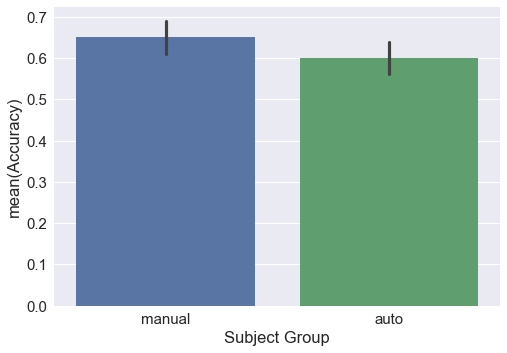

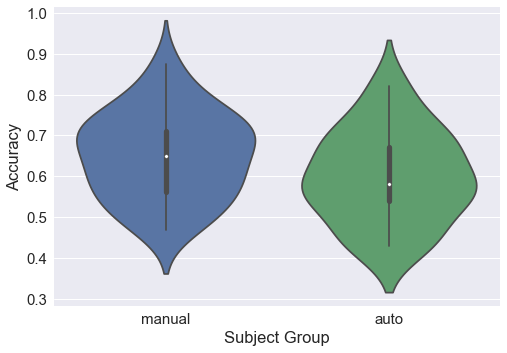

Ttest_relResult(statistic=7.6053046842752678, pvalue=2.1966010495089288e-08)

In [8]:
analyzed_egg = quail.analyze(egg, analysis='accuracy', listgroup=['average']*8)
ax = quail.plot(analyzed_egg, subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject')
ax = quail.plot(analyzed_egg, subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject', plot_style='violin')

from scipy.stats import ttest_rel as ttest
ttest(analyzed_egg[0][:n_subs], analyzed_egg[0][n_subs:])

# Cohen's D for effect size
# def cohen_d(x,y):
#     nx = len(x)
#     ny = len(y)
#     dof = nx + ny - 2
#     return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)
# print cohen_d(manual, auto)



<h1>Compare Curves for Manual and Auto Transcriptions (Exp 7)</h1>

<h2> Serial Position Curve</h2>

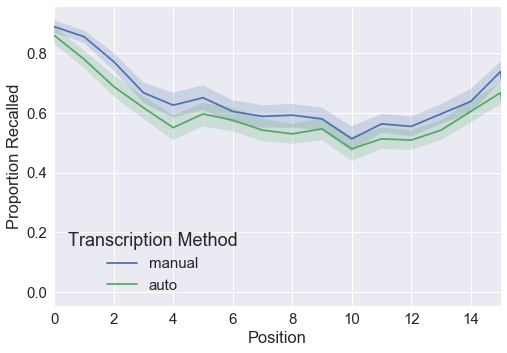

In [9]:
analyzed_egg = quail.analyze(egg, analysis='spc', listgroup=['average']*8)
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject')

## ANOVA

In [10]:
manual = list(pd.melt(analyzed_egg.ix[:(n_subs-1),:15].T)['value'].values)
auto = list(pd.melt(analyzed_egg.ix[n_subs:,:15].T)['value'].values)
all_data_spc = manual+auto

In [11]:
%%R -i all_data_spc,n_subs

stacked_groupAccData = data.frame(all_data_spc)
stacked_groupAccData[2] = factor(rep(c(0:(n_subs-1)),rep(16,n_subs)))
stacked_groupAccData[3] = factor(rep(c(0:15)))
stacked_groupAccData[4] = factor(rep(c("Manual","Auto"),c(nrow(stacked_groupAccData[1])/2,nrow(stacked_groupAccData[1])/2)))
colnames(stacked_groupAccData) = c("all_data","subject","list_position","condition")
aov.out = aov(all_data ~ list_position * condition + Error(subject/(list_position*condition)),data=stacked_groupAccData)
#all_data.aov <- with(stacked_groupAccData, aov(all_data ~ condition * list_position + Error(subject/(condition*list_position))))
print(summary(aov.out))
print(c('partial eta squared, condition:', .03613/(.03613+.2925)))
print(c('partial eta squared, list position:', 9.772/(9.772+25.412)))
print(c('partial eta squared, interaction:', .0275/(.0275+1.1234)))

ERROR:root:Cell magic `%%R` not found.


<h2> Probability of First Recall</h2>

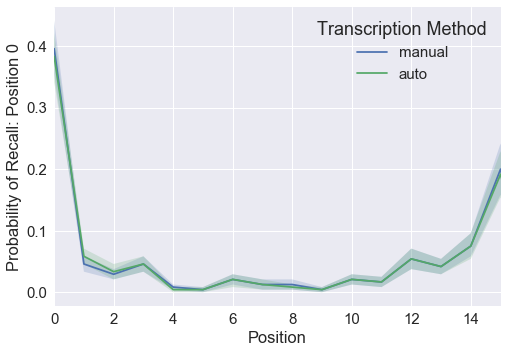

In [12]:
analyzed_egg = quail.analyze(egg, analysis='pfr', listgroup=['average']*8)
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject')

## ANOVA

In [13]:
manual = list(pd.melt(analyzed_egg.ix[:(n_subs-1),:15].T)['value'].values)
auto = list(pd.melt(analyzed_egg.ix[n_subs:,:15].T)['value'].values)
all_data_pfr = manual+auto

In [14]:
%%R -i all_data_pfr,n_subs

stacked_groupAccData = data.frame(all_data_pfr)
stacked_groupAccData[2] = factor(rep(c(0:(n_subs-1)),rep(16,n_subs)))
stacked_groupAccData[3] = factor(rep(c(0:15)))
stacked_groupAccData[4] = factor(rep(c("Manual","Auto"),c(nrow(stacked_groupAccData[1])/2,nrow(stacked_groupAccData[1])/2)))
colnames(stacked_groupAccData) = c("all_data","subject","list_position","condition")
aov.out = aov(all_data ~ list_position * condition + Error(subject/(list_position*condition)),data=stacked_groupAccData)
print(summary(aov.out))
print(c('partial eta squared, condition:', .001682/(.001682+.005208)))
print(c('partial eta squared, list position:', 8.359/(8.359+8.958)))
print(c('partial eta squared, interaction:', .02233/(.02233+.20521)))

ERROR:root:Cell magic `%%R` not found.


<h2>Lag CRP</h2>

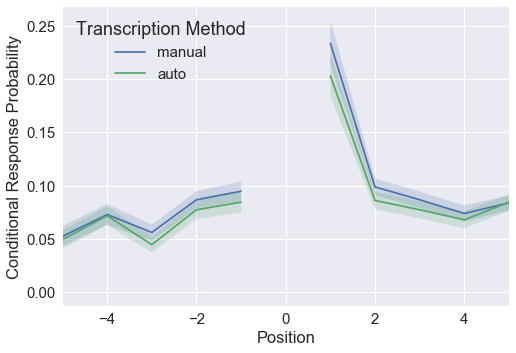

In [15]:
analyzed_egg = quail.analyze(egg, analysis='lagcrp', listgroup=['average']*8)
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject')

## ANOVA

In [16]:
manual = list(pd.melt(analyzed_egg.ix[:29,range(-5,0)+range(1,6)].T)['value'].values)
auto = list(pd.melt(analyzed_egg.ix[30:,range(-5,0)+range(1,6)].T)['value'].values)
all_data_lagcrp = manual+auto
from scipy.stats import ttest_rel as ttest
ttest(manual, auto)

Ttest_relResult(statistic=7.4459602466245123, pvalue=1.0349282728924857e-12)

In [17]:
data = analyzed_egg.ix[:,range(-5,0)+range(1,6)].mean(axis=1)
ttest(data[:30], data[30:])

Ttest_relResult(statistic=8.1738783062872429, pvalue=5.1706998580114269e-09)

In [18]:
%%R -i all_data_lagcrp,n_subs

stacked_groupAccData = data.frame(all_data_lagcrp)
stacked_groupAccData[2] = factor(rep(c(0:(n_subs-1)),rep(10,n_subs)))
stacked_groupAccData[3] = factor(rep(c(0:9)))
stacked_groupAccData[4] = factor(rep(c("Manual","Auto"),c(nrow(stacked_groupAccData[1])/2,nrow(stacked_groupAccData[1])/2)))
colnames(stacked_groupAccData) = c("all_data","subject","list_position","condition")
aov.out = aov(all_data ~ condition * list_position + Error(subject/(condition*list_position)),data=stacked_groupAccData)
print(summary(aov.out))
print(c('partial eta squared, condition:', .002785/(.002785+.005931)))
print(c('partial eta squared, list position:', 1.321/(1.321+1.623)))
print(c('partial eta squared, interaction:', .00296/(.00296+.05507)))

ERROR:root:Cell magic `%%R` not found.


## Temporal Clustering

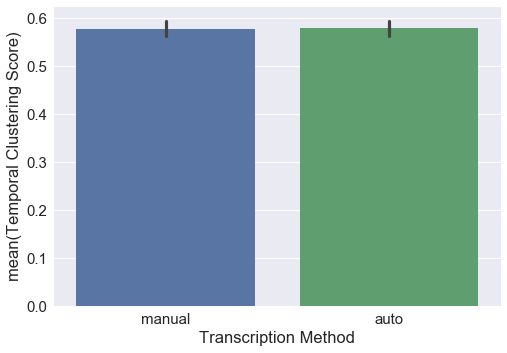

In [19]:
analyzed_egg = quail.analyze(egg, analysis='temporal')
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject')

In [20]:
#analyzed_egg = quail.analyze(egg, analysis='pnr_matrix', listgroup=['average']*8)

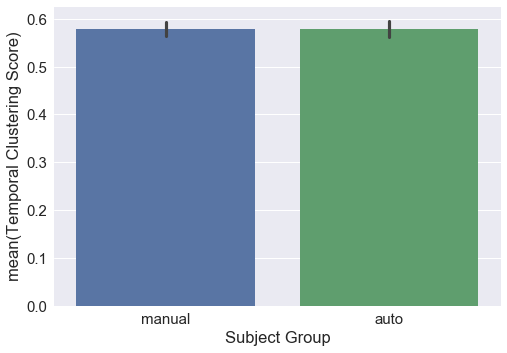

In [21]:
quail.plot(analyzed_egg, subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject')#, save_path='pnr-matrix.pdf')

# 7.1 Plots by Subject (Manual vs Auto)

## Accuracy (average)

In [22]:
# for sub in range(n_subs):
#     sub_eggm = quail.crack_egg(egg_7m, subjects=[sub])
#     sub_egga = quail.crack_egg(egg_7, subjects=[sub])
#     egg = quail.stack_eggs([sub_eggm,sub_egga])
#     analyzed_egg = quail.analyze(egg, analysis='accuracy', listgroup=['average']*8)
#     quail.plot(analyzed_egg, plot_type='subject', subjgroup=['manual','auto'], subjname='Decoding', title='Subject: ' + str(sub))

## Accuracy (by subject, by list)

In [23]:
# for sub in range(n_subs):
#     sub_eggm = quail.crack_egg(egg_7m, subjects=[sub])
#     sub_egga = quail.crack_egg(egg_7, subjects=[sub])
#     egg = quail.stack_eggs([sub_eggm,sub_egga])
#     analyzed_egg = quail.analyze(egg, analysis='accuracy')
#     quail.plot(analyzed_egg, listgroup=['Manual']*8+['Auto']*8, subjgroup=['Manual', 'Auto'], plot_type='split', listname='List number', title='Subject: ' + str(sub))

## Outliers

In [24]:
# operation done on difference between recall accuracy according to manual and according to auto
analyzed_auto = quail.analyze(egg_7, analysis='accuracy', listgroup=['average']*8)
analyzed_man = quail.analyze(egg_7m, analysis='accuracy', listgroup=['average']*8)
diff_scores = []
for i in range(n_subs):
    score= float((np.array(analyzed_man)[i])-(np.array(analyzed_auto)[i]))
    diff_scores.append(score)
print diff_scores

def is_outlier(list):
    q75, q25 = np.percentile(list, [75, 25])
    iqr = q75-q25
    print "outliers are < " + str(q75+(1.5*iqr)) + " or < " + str(q25-(1.5*iqr))
    for score in list:
        if score > q75+(1.5*iqr) or i < q25-(1.5*iqr):
            print "subject " + str(list.index(score)) + " is an outlier, with a score of " + str(score)

[0.015625, 0.0546875, 0.03125, 0.0390625, 0.0859375, 0.015625, 0.1171875, 0.078125, 0.0703125, 0.015625, 0.0390625, 0.03125, 0.078125, 0.0, 0.046875, 0.1015625, 0.0234375, 0.0546875, 0.015625, 0.15625, 0.03125, 0.046875, 0.0703125, 0.03125, 0.0390625, 0.0234375, 0.0078125, 0.046875, 0.0546875, 0.125]


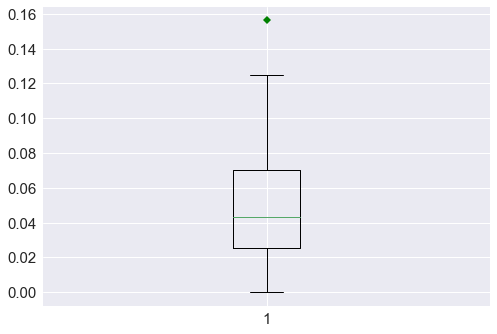

outliers are < 0.1376953125 or < -0.0419921875
subject 19 is an outlier, with a score of 0.15625


In [25]:
plt.figure()
plt.boxplot(diff_scores, 0, 'gD')
plt.show()
#plt.savefig('boxplot.pdf')
is_outlier(diff_scores)

## SPC

In [26]:
# for sub in range(n_subs):
#     sub_eggm = quail.crack_egg(egg_7m, subjects=[sub])
#     sub_egga = quail.crack_egg(egg_7, subjects=[sub])
#     egg = quail.stack_eggs([sub_eggm,sub_egga])
#     analyzed_egg = quail.analyze(egg, analysis='spc', listgroup=['average']*8)
#     quail.plot(analyzed_egg, plot_type='subject', subjgroup=['manual','auto'], subjname='Decoding', title='Subject: ' + str(sub))

In [27]:
# sub_eggm = quail.crack_egg(egg_7m, subjects=[8])
# sub_egga = quail.crack_egg(egg_7, subjects=[8])
# print sub_eggm.pres
# print
# print
# print sub_egga.rec

<h1>PFR Average </h1>

In [28]:
# for sub in range(n_subs):
#     sub_eggm = quail.crack_egg(egg_7m, subjects=[sub])
#     sub_egga = quail.crack_egg(egg_7, subjects=[sub])
#     egg = quail.stack_eggs([sub_eggm,sub_egga])
#     analyzed_egg = quail.analyze(egg, analysis='pfr', listgroup=['average']*8)
#     quail.plot(analyzed_egg, plot_type='subject', subjgroup=['manual','auto'], subjname='Decoding', title='Subject: ' + str(sub))

<h1>Lag CRP, Average</h1>

In [29]:
# for sub in range(n_subs):
#     sub_eggm = quail.crack_egg(egg_7m, subjects=[sub])
#     sub_egga = quail.crack_egg(egg_7, subjects=[sub])
#     egg = quail.stack_eggs([sub_eggm,sub_egga])
#     analyzed_egg = quail.analyze(egg, analysis='lagcrp', listgroup=['average']*8)
#     quail.plot(analyzed_egg, plot_type='subject', subjgroup=['manual','auto'], subjname='Decoding', title='Subject: ' + str(sub))

# 8.1 Scatter Plots

## Accuracy

In [30]:
analyzed_egg7_acc = quail.analyze(egg_7, analysis='accuracy', listgroup=['average']*8)
analyzed_egg7m_acc = quail.analyze(egg_7m, analysis='accuracy', listgroup=['average']*8)

man_acc = list(analyzed_egg7m_acc[0])
auto_acc = list(analyzed_egg7_acc[0])

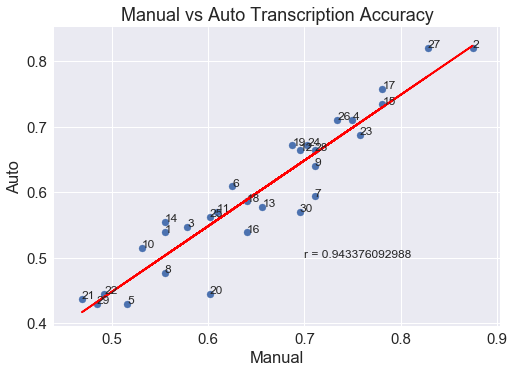

In [31]:
plt.scatter(man_acc, auto_acc)
plt.title('Manual vs Auto Transcription Accuracy')
plt.xlabel('Manual')
plt.ylabel('Auto')

n = list(range(1,(n_subs+1)))
for i, sub in enumerate(n):
    plt.annotate(sub, (man_acc[i],auto_acc[i]), fontsize=12)

reg_line = np.polyfit(man_acc, auto_acc, 1)
plt.plot(man_acc, np.poly1d(reg_line)(man_acc), color='red')
#plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)

from scipy.stats import pearsonr
r = pearsonr(man_acc, auto_acc)
plt.text(0.7, 0.5, 'r = ' + str(r[0]), fontsize=12)
#plt.savefig('accuracy-scatter.pdf')

## Serial Position Curve

In [32]:
analyzed_egg7_spc = quail.analyze(egg_7, analysis='spc', listgroup=['average']*8)
analyzed_egg7m_spc = quail.analyze(egg_7m, analysis='spc', listgroup=['average']*8)
analyzed_egg7_spc['avg'] = analyzed_egg7_spc.ix[:, :16].mean(axis=1)
analyzed_egg7m_spc['avg'] = analyzed_egg7m_spc.ix[:, :16].mean(axis=1)
auto_spc = list(analyzed_egg7_spc['avg'])
man_spc = list(analyzed_egg7m_spc['avg'])

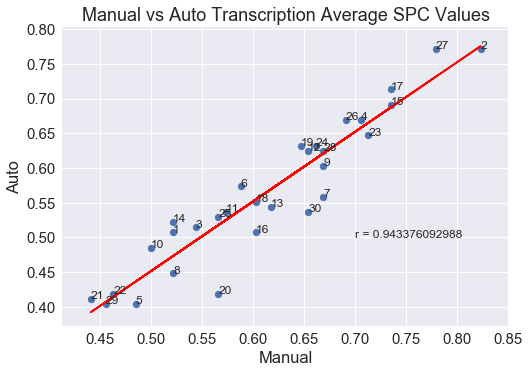

In [33]:
plt.scatter(man_spc, auto_spc)
plt.title('Manual vs Auto Transcription Average SPC Values')
plt.xlabel('Manual')
plt.ylabel('Auto')

n = list(range(1,(n_subs+1)))
for i, sub in enumerate(n):
    plt.annotate(sub, (man_spc[i],auto_spc[i]), fontsize=12)

reg_line = np.polyfit(man_spc, auto_spc, 1)
plt.plot(man_spc, np.poly1d(reg_line)(man_spc), color='red')
#plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)

from scipy.stats import pearsonr
r = pearsonr(man_spc, auto_spc)
plt.text(0.7, 0.5, 'r = ' + str(r[0]), fontsize=12)
#plt.savefig('spc-scatter.pdf')

## Primacy Effect

In [34]:
#### first three words of each list for each subject (auto transcription)
pres_primacy_auto = egg_7.pres.ix[:,0:2]

# lists for recall accuracy for first 3 words in each list for each subject (auto transcription)
pres_primacy_auto_list = []
rec_primacy_auto_list = []

for sub in range(n_subs):
    pres_primacy_auto_list.append(pres_primacy_auto.ix[sub].values.tolist())
    rec_primacy_auto_list.append(egg_7.rec.ix[sub].values.tolist())
    
# compute recall accuracy for first 3 words in each list for each subject (auto transcription)
egg_primacy_auto = quail.Egg(pres=pres_primacy_auto_list, rec=rec_primacy_auto_list)
analyzed_primacy_egg_auto = quail.analyze(egg_primacy_auto, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (auto)
primacy_auto_list = analyzed_primacy_egg_auto.ix[:,0].tolist()


#### words 4-10 of each list for each subject
pres_other_auto = egg_7.pres.ix[:,3:9]

# lists for recall accuracy for words 4-10 in each list for each subject (auto transcription)
pres_other_auto_list = []
rec_other_auto_list = []

for sub in range(n_subs):
    pres_other_auto_list.append(pres_other_auto.ix[sub].values.tolist())
    rec_other_auto_list.append(egg_7.rec.ix[sub].values.tolist())
    
# compute recall accuracy for words 4-10 in each list for each subject (auto transcription)
egg_other_auto = quail.Egg(pres=pres_other_auto_list, rec=rec_other_auto_list)
analyzed_other_egg_auto = quail.analyze(egg_other_auto, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (auto)
other_auto_list = analyzed_other_egg_auto.ix[:,0].tolist()


#### create ratio list for primacy effect (auto)
primacy_effect_auto = []
for i in range(n_subs):
    ratio = primacy_auto_list[i]/other_auto_list[i]
    primacy_effect_auto.append(ratio)
    
    

#### first three words of each list for each subject
pres_primacy_man = egg_7m.pres.ix[:,0:2]

# lists for recall accuracy for first 3 words in each list for each subject (manual transcription)
pres_primacy_man_list = []
rec_primacy_man_list = []

for sub in range(n_subs):
    pres_primacy_man_list.append(pres_primacy_man.ix[sub].values.tolist())
    rec_primacy_man_list.append(egg_7m.rec.ix[sub].values.tolist())
    
# compute recall accuracy for first 3 words in each list for each subject (manual transcription)
egg_primacy_man = quail.Egg(pres=pres_primacy_man_list, rec=rec_primacy_man_list)
analyzed_primacy_egg_man = quail.analyze(egg_primacy_man, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (manual)
primacy_man_list = analyzed_primacy_egg_man.ix[:,0].tolist()


#### words 4-10 of each list for each subject
pres_other_man = egg_7.pres.ix[:,3:9]

# lists for recalled accuracy for words 4-10 in each list for each subject (manual transcription)
pres_other_man_list = []
rec_other_man_list = []

for sub in range(n_subs):
    pres_other_man_list.append(pres_other_man.ix[sub].values.tolist())
    rec_other_man_list.append(egg_7.rec.ix[sub].values.tolist())
    
# compute recall accuracy for words 4-10 in each list for each subject (manual transcription)
egg_other_man = quail.Egg(pres=pres_other_man_list, rec=rec_other_man_list)
analyzed_other_egg_man = quail.analyze(egg_other_man, analysis='accuracy', listgroup=['average']*8)

# list of accuracies for each subject, averaged across 8 lists (manual)
other_man_list = analyzed_other_egg_man.ix[:,0].tolist()

#### create ratio list for primacy effect (manual)
primacy_effect_man = []
for i in range(n_subs):
    ratio = primacy_man_list[i]/other_man_list[i]
    primacy_effect_man.append(ratio)


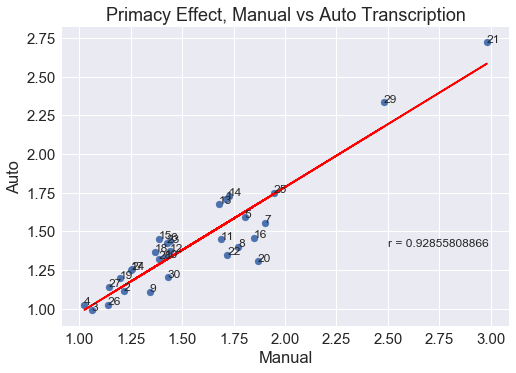

In [35]:
plt.scatter(primacy_effect_man, primacy_effect_auto)
plt.title('Primacy Effect, Manual vs Auto Transcription')
plt.xlabel('Manual')
plt.ylabel('Auto')

n = list(range(1,(n_subs+1)))
for i, sub in enumerate(n):
    plt.annotate(sub, (primacy_effect_man[i],primacy_effect_auto[i]), fontsize=12)

reg_line = np.polyfit(primacy_effect_man, primacy_effect_auto, 1)
plt.plot(primacy_effect_man, np.poly1d(reg_line)(primacy_effect_man), color='red')
#plt.text(2.5, 1.4, 'm = ' + str(reg_line[0]), fontsize=12)

from scipy.stats import pearsonr
r = pearsonr(primacy_effect_man, primacy_effect_auto)
plt.text(2.5, 1.4, 'r = ' + str(r[0]), fontsize=12)
#plt.savefig('primacy-effect-scatter.pdf')

## Temporal Clustering

In [36]:
analyzed_egg7_temp = quail.analyze(egg_7, analysis='temporal', listgroup=['average']*8)
analyzed_egg7m_temp = quail.analyze(egg_7m, analysis='temporal', listgroup=['average']*8)

man_temp = list(analyzed_egg7m_temp[0])
auto_temp = list(analyzed_egg7_temp[0])

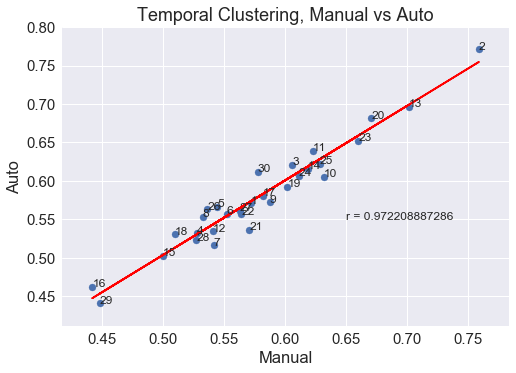

In [37]:
plt.scatter(man_temp, auto_temp)
plt.title('Temporal Clustering, Manual vs Auto')
plt.xlabel('Manual')
plt.ylabel('Auto')

n = list(range(1,(n_subs+1)))
for i, sub in enumerate(n):
    plt.annotate(sub, (man_temp[i],auto_temp[i]), fontsize=12)

reg_line = np.polyfit(man_temp, auto_temp, 1)
plt.plot(man_temp, np.poly1d(reg_line)(man_temp), color='red')
#plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)

from scipy.stats import pearsonr
r = pearsonr(man_temp, auto_temp)
plt.text(0.65, 0.55, 'r = ' + str(r[0]), fontsize=12)
#plt.savefig('temporal-clustering-scatter.pdf')

# edits for CEMS poster

### accuracy

In [38]:
# analyzed_egg7_acc = quail.analyze(egg_7, analysis='accuracy', listgroup=['average']*8)
# analyzed_egg7m_acc = quail.analyze(egg_7m, analysis='accuracy', listgroup=['average']*8)

# man_acc = list(analyzed_egg7m_acc[0])
# auto_acc = list(analyzed_egg7_acc[0])

In [50]:
# fig = plt.figure(1)
# ax = fig.add_subplot(111, axisbg='white')
# reg_line = np.polyfit(man_acc, auto_acc, 1)
# plt.plot(man_acc, np.poly1d(reg_line)(man_acc), color='black', linewidth=3.0)
# # plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)
# ax.scatter(man_acc, auto_acc, c=(1, 0, 0, 1), s=120, linewidth=2.0)
# plt.grid(False)
# plt.axis([.3, .9, .3, .9])
# #plt.title('Recall Accuracy', fontsize=40)
# #plt.xlabel('Manual Transcription', fontsize=40)
# #plt.ylabel('Auto Transcription', fontsize=40)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick', labelsize=25)


# # n = list(range(1,(n_subs+1)))
# # for i, sub in enumerate(n):
# #     plt.annotate(sub, (man_acc[i],auto_acc[i]+.01), fontsize=12)



# from scipy.stats import pearsonr
# r = pearsonr(man_acc, auto_acc)
# plt.text(0.684, 0.35, 'r = ' + str(0.953), fontsize=30, fontweight='bold')
# #plt.text(0.5, 0.35, 'r = ' + str(r[0]), fontsize=30, fontweight='bold')
# #plt.savefig('rec_acc_scatter.pdf', bbox_inches='tight')
# print r

### primacy effect

In [51]:
# fig = plt.figure(2)
# ax = fig.add_subplot(111, axisbg='white')
# ax.scatter(primacy_effect_man, primacy_effect_auto, c=(1, 0, 0, 1), s=120, linewidth=2.0)
# plt.grid(False)
# plt.axis([1, 3.3, 1, 3.3])

# plt.title('Primacy Effect', fontsize=40)
# plt.xlabel('Manual Transcription', fontsize=40)
# plt.ylabel('Auto Transcription', fontsize=40)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick', labelsize=25)

# # n = list(range(1,(n_subs+1)))
# # for i, sub in enumerate(n):
# #     plt.annotate(sub, (primacy_effect_man[i],primacy_effect_auto[i]), fontsize=12)

# reg_line = np.polyfit(primacy_effect_man, primacy_effect_auto, 1)
# plt.plot(primacy_effect_man, np.poly1d(reg_line)(primacy_effect_man), color='black', linewidth=3.0)
# #plt.text(2.5, 1.4, 'm = ' + str(reg_line[0]), fontsize=12)

# from scipy.stats import pearsonr
# r = pearsonr(primacy_effect_man, primacy_effect_auto)
# plt.text(2.5, 1.2, 'r = ' + str(0.944), fontsize=30, fontweight='bold')
# #plt.text(1.5, 2.5, 'r = ' + str(r[0]), fontsize=30, fontweight='bold')
# #plt.savefig('primacy_effect_scatter.pdf', bbox_inches='tight')
# print r

## temporal clustering

In [41]:
# analyzed_egg7_temp = quail.analyze(egg_7, analysis='temporal', listgroup=['average']*8)
# analyzed_egg7m_temp = quail.analyze(egg_7m, analysis='temporal', listgroup=['average']*8)

# man_temp = list(analyzed_egg7m_temp[0])
# auto_temp = list(analyzed_egg7_temp[0])

In [52]:
# fig = plt.figure(3)
# ax = fig.add_subplot(111, axisbg='white')
# ax.scatter(man_temp, auto_temp, c=(1, 0, 0, 1), s=120, linewidth=2.0)
# plt.grid(False)
# plt.axis([.3, .8, .3, .8])
# #plt.title('Temporal Clustering', fontsize=40)
# #plt.xlabel('Manual Transcription', fontsize=40)
# #plt.ylabel('Auto', fontsize=40)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick', labelsize=25)

# # n = list(range(1,(n_subs+1)))
# # for i, sub in enumerate(n):
# #     plt.annotate(sub, (man_temp[i],auto_temp[i]), fontsize=12)

# reg_line = np.polyfit(man_temp, auto_temp, 1)
# plt.plot(man_temp, np.poly1d(reg_line)(man_temp), color='black', linewidth=3.0)
# #plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)

# from scipy.stats import pearsonr
# r = pearsonr(man_temp, auto_temp)
# plt.text(.7, .31, 'r = ' + str(0.932), fontsize=30, fontweight='bold')
# #plt.text(1.5, 2.5, 'r = ' + str(r[0]), fontsize=30, fontweight='bold')
# #plt.savefig('temporal_clustering.pdf', bbox_inches='tight')
# print r

# Edits for AutoFR Paper

In [43]:
bwdict = {'manual':'black','auto':'gray'}

### Serial Position Curve

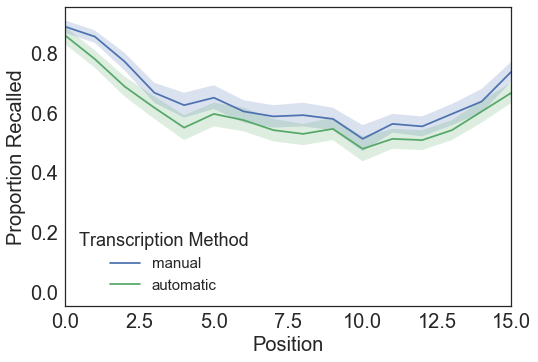

In [44]:
analyzed_egg = quail.analyze(egg, analysis='spc', listgroup=['average']*8)
sns.set_style('white')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['automatic']*n_subs, plot_type='subject', save_path='../AutoFR-figures/spc.pdf')

### Probability of First Recall

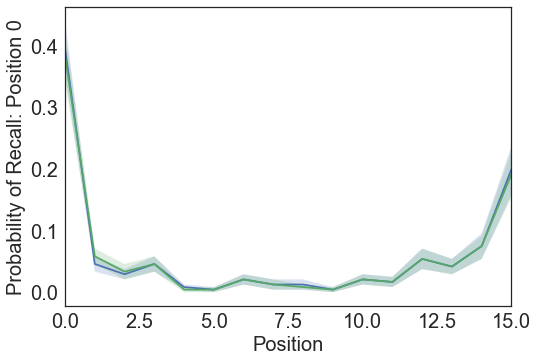

In [45]:
analyzed_egg = quail.analyze(egg, analysis='pfr', listgroup=['average']*8)
sns.set_style('white')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject', legend=False, save_path='../AutoFR-figures/pfr.pdf')

### Lag CRP

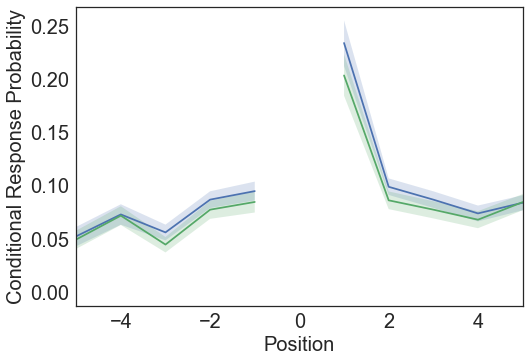

In [46]:
analyzed_egg = quail.analyze(egg, analysis='lagcrp', listgroup=['average']*8)
sns.set_style('white')
# plt.rcParams["axes.labelsize"] = 20
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20
ax = quail.plot(analyzed_egg, subjname ='Transcription Method', subjgroup=['manual']*n_subs+['auto']*n_subs, plot_type='subject', legend=False, save_path='../AutoFR-figures/lagcrp.pdf')

### accuracy scatter

(0.94337609298791081, 6.0230959636864933e-15)


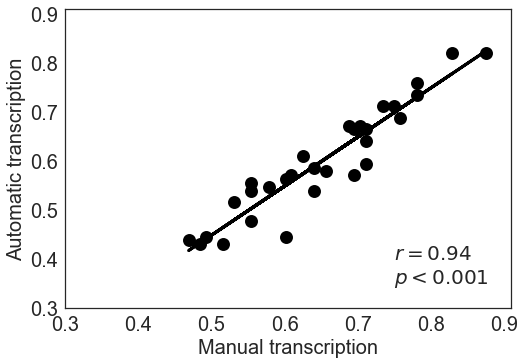

In [47]:
analyzed_egg7_acc = quail.analyze(egg_7, analysis='accuracy', listgroup=['average']*8)
analyzed_egg7m_acc = quail.analyze(egg_7m, analysis='accuracy', listgroup=['average']*8)

man_acc = list(analyzed_egg7m_acc[0])
auto_acc = list(analyzed_egg7_acc[0])

################################

fig = plt.figure(1)
ax = fig.add_subplot(111, axisbg='white')
reg_line = np.polyfit(man_acc, auto_acc, 1)
plt.plot(man_acc, np.poly1d(reg_line)(man_acc), color='black', linewidth=3.0)
# plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)
ax.scatter(man_acc, auto_acc, c=('black'), s=120, linewidth=2.0)
plt.grid(False)
plt.axis([.3, .91, .3, .91])
#plt.title('Recall Accuracy', fontsize=40)
#plt.xlabel('Manual Transcription', fontsize=40)
#plt.ylabel('Auto Transcription', fontsize=40)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Manual transcription', fontsize = 20)
plt.ylabel('Automatic transcription', fontsize = 20)


# n = list(range(1,(n_subs+1)))
# for i, sub in enumerate(n):
#     plt.annotate(sub, (man_acc[i],auto_acc[i]+.01), fontsize=12)



from scipy.stats import pearsonr
r = pearsonr(man_acc, auto_acc)
plt.text(0.75, 0.4, '$r=0.94$', fontsize=20)
plt.text(0.75, 0.35, '$p<0.001$', fontsize=20)
#plt.text(0.73, 0.35, 'r = ' + str(r), fontsize=20)
plt.savefig('../AutoFR-figures/accuracy-scatter-gray.pdf', bbox_inches='tight')
print r

### primacy effect scatter

(0.92855808865966372, 1.4222986059817875e-13)


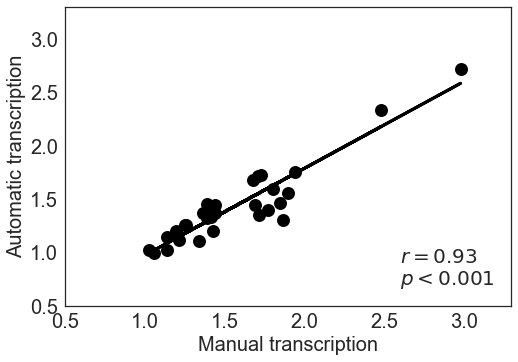

In [48]:
fig = plt.figure(2)
ax = fig.add_subplot(111, axisbg='white')
ax.scatter(primacy_effect_man, primacy_effect_auto, c='black', s=120, linewidth=2.0)
plt.grid(False)
plt.axis([0.5, 3.3, 0.5, 3.3])


plt.xlabel('Manual transcription', fontsize=20)
plt.ylabel('Automatic transcription', fontsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# n = list(range(1,(n_subs+1)))
# for i, sub in enumerate(n):
#     plt.annotate(sub, (primacy_effect_man[i],primacy_effect_auto[i]), fontsize=12)

reg_line = np.polyfit(primacy_effect_man, primacy_effect_auto, 1)
plt.plot(primacy_effect_man, np.poly1d(reg_line)(primacy_effect_man), color='black', linewidth=3.0)
#plt.text(2.5, 1.4, 'm = ' + str(reg_line[0]), fontsize=12)

from scipy.stats import pearsonr
r = pearsonr(primacy_effect_man, primacy_effect_auto)
plt.text(2.6, .9, '$r=0.93$', fontsize=20)
plt.text(2.6, 0.7, '$p<0.001$', fontsize=20)
#plt.text(1.5, 2.5, 'r = ' + str(r), fontsize=30, fontweight='bold')
plt.savefig('../AutoFR-figures/primacy-effect-scatter-gray.pdf', bbox_inches='tight')
print r

### temporal clustering scatter

(0.97220888728609089, 3.3877610374497162e-19)


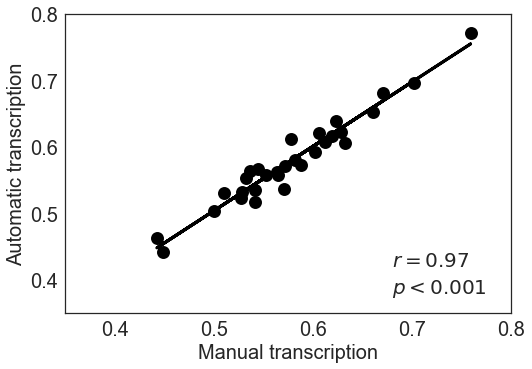

In [49]:
analyzed_egg7_temp = quail.analyze(egg_7, analysis='temporal', listgroup=['average']*8)
analyzed_egg7m_temp = quail.analyze(egg_7m, analysis='temporal', listgroup=['average']*8)

man_temp = list(analyzed_egg7m_temp[0])
auto_temp = list(analyzed_egg7_temp[0])

#######################################

fig = plt.figure(3)
ax = fig.add_subplot(111, axisbg='white')
ax.scatter(man_temp, auto_temp, c='black', s=120, linewidth=2.0)
plt.grid(False)
plt.axis([.35, .8, .35, .8])
#plt.title('Temporal Clustering', fontsize=40)
#plt.xlabel('Manual Transcription', fontsize=40)
#plt.ylabel('Auto', fontsize=40)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Manual transcription', fontsize=20)
plt.ylabel('Automatic transcription', fontsize=20)

# n = list(range(1,(n_subs+1)))
# for i, sub in enumerate(n):
#     plt.annotate(sub, (man_temp[i],auto_temp[i]), fontsize=12)

reg_line = np.polyfit(man_temp, auto_temp, 1)
plt.plot(man_temp, np.poly1d(reg_line)(man_temp), color='black', linewidth=3.0)
#plt.text(0.7, 0.5, 'm = ' + str(reg_line[0]), fontsize=12)

from scipy.stats import pearsonr
r = pearsonr(man_temp, auto_temp)
plt.text(.68, .42, '$r=0.97$', fontsize=20)
plt.text(.68, .38, '$p<0.001$', fontsize=20)
#plt.text(.65, .37, 'r = ' + str(r), fontsize=30, fontweight='bold')
plt.savefig('../AutoFR-figures/temporal-clustering-scatter-gray.pdf', bbox_inches='tight')
print r